## Observation

In [1]:
# Library

In [2]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import linear_kernel

In [3]:
X, y= make_blobs(n_samples = 100, n_features = 2, centers = 2, cluster_std = 3, random_state = 1)

In [4]:
y = np.where(y==1, 1, -1)

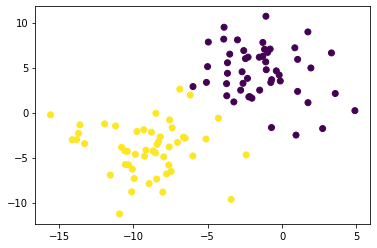

In [5]:
plt.scatter(X[:,0], X[:,1], c = y);

The equation is written as follows

$\mathcal{D}(\alpha) = \alpha YY^TK(x_i, x_j)\alpha^T - \alpha^T 1$

subject to $\alpha^T Y = 0$ and $0 \leq \alpha \geq C$

Which can be solved for $\alpha$ with a quadratic optimization library (`cvxopt`)

For which we have to create a set of parameters that have the form of the quadratic solver function arguments:

$f(x) = x^TQx + qx$

subject to $Ax = b$ and $Gx \leq h$

$\therefore$ $Q \sim YY^TK(x_i, x_j)$ $\;\;\;\;\;\;$ | $\;\;\;\;\;\;$ $q \sim 1$ $\;\;\;\;\;\;$ | $\;\;\;\;\;\;$ $A \sim Y$ $\;\;\;\;\;\;$ | $\;\;\;\;\;\;$ $b \sim 0$ $\;\;\;\;\;\;$ | $\;\;\;\;\;\;$ $G \sim I$ $\;\;\;\;\;\;$ | $\;\;\;\;\;\;$ $h \sim \leq C \text{ and } \geq 0$

f(x)

In [6]:
# Kernel
H = linear_kernel(X, X)
# YY
Y = np.outer(y, y)
# Q
Q = np.multiply(Y, H)
# q
q = -np.ones(y.shape)

Ax = b

In [7]:
# A
A = np.array(y.reshape(1, -1), dtype = "float64")
# b
b = 0.0

Gx $\leq$ h

In [8]:
# G
# dim y
ydim = y.shape[0]
# G for 0 < a and a < C
G = np.concatenate((np.identity(ydim), -np.identity(ydim)))

# C
C = 0.001
# h for 0 < a and a < C
h_ = np.concatenate((C*np.ones(ydim), np.zeros(ydim)))
h = h_.reshape(-1, 1)

### Optimization

In [9]:
from cvxopt import matrix, solvers

In [10]:
Q = matrix(Q)
q = matrix(q)
A = matrix(A)
b = matrix(b)
G = matrix(G)
h = matrix(h)

In [11]:
sol=solvers.qp(P=Q, q=q,G=G,h=h, A=A, b=b);

     pcost       dcost       gap    pres   dres
 0: -8.0037e+00 -1.7195e-01  5e+02  2e+01  3e-14
 1: -1.0489e-01 -1.7184e-01  5e+00  2e-01  3e-14
 2: -2.5430e-02 -1.6138e-01  2e-01  4e-03  7e-16
 3: -2.5139e-02 -4.5752e-02  2e-02  2e-18  3e-16
 4: -3.0806e-02 -3.4730e-02  4e-03  2e-18  3e-16
 5: -3.2353e-02 -3.3140e-02  8e-04  2e-18  2e-16
 6: -3.2712e-02 -3.2800e-02  9e-05  2e-18  2e-16
 7: -3.2753e-02 -3.2758e-02  4e-06  2e-18  2e-16
 8: -3.2755e-02 -3.2756e-02  9e-08  2e-18  3e-16
Optimal solution found.


To get the $\omega$ and $b$ values, We have to get back to the first order equations from the primal Lagrangian.

$\omega = \sum_{k = 1}^N \alpha_k
y_k x_k$

$b = y_l - \langle \omega, x_l  \rangle$

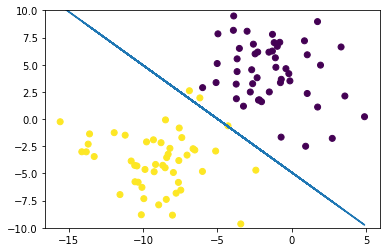

In [12]:
alphas = np.array(sol['x'])
indx = alphas > 1e-10
alpha_sv = alphas[indx]
x_sv = X[indx[:,0],:]
y_sv = y[indx[:,0]]

#%% w and b
w = np.sum(np.c_[alpha_sv*y_sv,alpha_sv*y_sv]*x_sv,axis=0)
b = np.mean(y-np.dot(X,w))

#%% Plotting
plt.scatter(X[:,0], X[:,1], c = y)
plt.plot(X[:,0],(-w[0]*X[:,0]-b)/w[1])
plt.ylim(-10, 10);

In [13]:
alphas[alphas > 1e-4].shape

(49,)

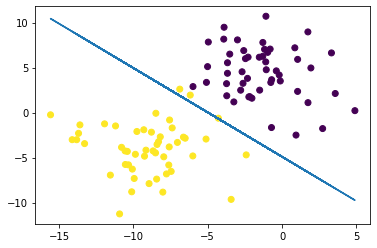

In [14]:
plt.scatter(x_sv[:,0], x_sv[:,1], c = y_sv)
plt.plot(X[:,0],(-w[0]*X[:,0]-b)/w[1]);